# Analytic solution

In [1]:
import numpy
from matplotlib import pyplot
from scrapexs import scrape

## Material properties

In [19]:
pureAbsU = scrape('fp_1D_1G_PA_res.m')[12]
sigt = pureAbsU.xs['tot'][0]
invv = pureAbsU.xs['invv'][0] * 1E4

## Geometric properties

In [13]:
xlim = 1
nX = 100
tlim = 1E-2
nT = 100
xgrid = numpy.linspace(0, xlim, nX)
tgrid = numpy.linspace(0, tlim, nT)
tlim / nT, xlim  / nX

(0.0001, 0.01)

## Left boundary condition

In [14]:
def gamma1(mu, t):
    return mu * (numpy.sin( 1E3*t) ** 2)

## Generate analytic solution

In [15]:
mu = 0.577
tMesh, xMesh = numpy.meshgrid(tgrid, xgrid)
soln = numpy.empty_like(tMesh)

In [16]:
shiftedXMesh = xMesh * invv / mu
unit1 = numpy.where(tMesh - shiftedXMesh > 0)
unit0 = numpy.where(tMesh - shiftedXMesh <= 0)
predMesh = numpy.exp(-xMesh[unit1] * sigt / mu)

In [17]:
soln[unit0] = 0.0
soln[unit1] = (
    predMesh
    * gamma1(mu, tMesh[unit1]  - shiftedXMesh[unit1])
)

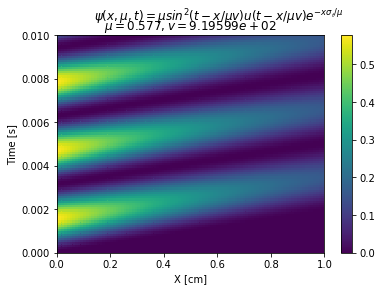

In [18]:
pyplot.pcolormesh(xMesh, tMesh, soln)
pyplot.colorbar()
pyplot.xlabel('X [cm]')
pyplot.ylabel('Time [s]')
title = (
    r'$\psi(x, \mu, t) = \mu sin^2(t-x/\mu v)u(t-x/\mu v)e^{-x\sigma_t/\mu}$'
)
muTitle = r'$\mu={}, v={:7.5e}$'.format(mu, 1/invv)
pyplot.title(muTitle);
pyplot.suptitle(title);

# As function

In [9]:
def analytic(mu, tvec, xvec, sigmat, invvel, gammaFunc):
    if not isinstance(tvec, numpy.ndarray):
        tvec = numpy.array(tvec, dtype=float)
    meshT, meshX = numpy.meshgrid(tvec, xvec)
    meshXShift = meshX  * invv / mu
    unitStep1 = numpy.where(meshXShift < meshT)
    unitStep0 = numpy.where(meshXShift >= meshT)
    out = numpy.empty_like(meshT)
    out[unitStep0] = 0.0
    out[unitStep1] = (
        gammaFunc(mu, meshT[unitStep1] - meshXShift[unitStep1]) *
        numpy.exp(-meshX[unitStep1] * sigmat / mu))
    return out

In [10]:
func = analytic(mu, tgrid, xgrid, sigt, invv, gamma1)

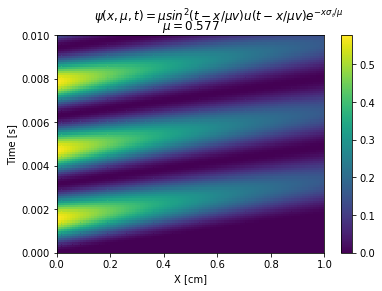

In [11]:
pyplot.pcolormesh(xMesh, tMesh, func)
pyplot.colorbar()
pyplot.xlabel('X [cm]')
pyplot.ylabel('Time [s]')
title = (
    r'$\psi(x, \mu, t) = \mu sin^2(t-x/\mu v)u(t-x/\mu v)e^{-x\sigma_t/\mu}$'
)
muTitle = r'$\mu={}$'.format(mu)
pyplot.title(muTitle);
pyplot.suptitle(title);